# Preproccesing

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [ ]:
# !gdown  1TVmI7nhTLjdd_6ghEcjLp_9wW0HWi2oa

In [ ]:
# ! unzip '/content/FinalProjectMat.zip'

In [ ]:
print('artifacts')
print(len(os.listdir('artifacts')))
print('piano_pieces')
print(len(os.listdir('piano_pieces')))
print('piano_triads')
print(len(os.listdir('piano_triads')))

artifacts
40
piano_pieces
400
piano_triads
432


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy import signal
from IPython.display import Audio, Image
from PIL import Image, ImageDraw
import librosa
import librosa.display
import pylab
from numpy.fft import fft, ifft
%matplotlib inline
import math

In [ ]:
songs = os.listdir('piano_pieces')

In [ ]:
#split notes names in 4
def get_split(input):
  splited = np.char.split(input, sep ='_')
  splited = list(splited)
  splited = np.array(splited)
  return splited

In [ ]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

In [ ]:
#load song.txt files in a list
songs_list = []
for song in songs:
  piece = np.loadtxt('piano_pieces/' + song, dtype=str)
  piece = piece[piece != '/']
  # temp = []
  # for note in piece:
  #   index = find_nth(note,"_",2)
  #   one = note[:index]
  #   two = note[index+1:]
  #   temp_note = [one,two[0],two[2]]
  #   temp.append(temp_note)
  songs_list.append(piece)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "piano_pieces/Song1.txt"
  after removing the cwd from sys.path.


In [ ]:
len(songs_list)

400

In [ ]:
# temp_array = []
# new_list = []
# # temp = songs_list[0] + "_" + songs_list[1]
# # temp_array.append([temp, songs_list[2], songs_list[3]])
# for i in songs_list:
#   for j in i:
#     temp = j[0] + "_" + j[1]
#     temp_array.append([temp, j[2], j[3]])
#   new_list.append(temp_array)

In [ ]:
#from length 3 to 30 add notes to X and the following note to y
X = []
y = []
sample_length =15
for song in songs_list:
  for i in range(0,len(song)-sample_length): # go through each song and get x and y
    temp = song[i:i + sample_length]
    X.append(temp)
    y.append(song[i+sample_length])

In [ ]:
data_length =len(X)

In [ ]:
X = np.array(X)

In [ ]:
y = np.array(y)

In [ ]:
X.shape

(31325, 15)

In [ ]:
y.shape

(31325,)

In [ ]:
y[0:10]

array(['G_maj_4_0', 'Bb_maj_2_0', 'Eb_maj_5_1', 'D_min_5_1', 'E_dim_5_1',
       'A_maj_7_1', 'D_min_4_0', 'G_maj_4_0', 'Bb_maj_6_1', 'E_dim_5_0'],
      dtype='<U10')

In [ ]:
from sklearn.utils import shuffle



X, y = shuffle(X, y)
print(X[0])
print(y[0])

['G_maj_5_0' 'Fs_maj_6_0' 'B_maj_3_0' 'E_maj_4_0' 'A_maj_2_1' 'E_maj_7_0'
 'Fs_min_7_1' 'E_maj_2_1' 'A_maj_3_0' 'Eb_dim_6_0' 'D_maj_5_0' 'A_maj_2_1'
 'E_maj_5_1' 'Fs_min_2_0' 'Cs_min_2_0']
A_maj_4_0


In [ ]:
def OH_encoder(data):
  values = np.array(data)
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  # onehot_encoder = OneHotEncoder(sparse=False)
  # integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  # onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return integer_encoded

In [ ]:
temp_X = X.reshape(data_length*sample_length,)
print(temp_X.shape)

(469875,)


In [ ]:
temp_concat = np.concatenate((temp_X,y),axis=0)

In [ ]:
output1 = OH_encoder(temp_concat)

In [ ]:
output_X = output1[0:data_length*sample_length].reshape(data_length, sample_length)

In [ ]:
X = output_X

In [ ]:
y = output1[data_length*sample_length:]

In [ ]:
X = X.astype(int)
y = y.astype(int)

In [ ]:
from keras import Sequential
from keras.layers import LSTM,Dropout,Dense,Activation, Flatten, Embedding, Conv1D, MaxPool1D, GlobalMaxPool1D, Input

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def OH_encoder(data):
  values = np.array(data)
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return onehot_encoded

In [ ]:
# print(y[:,0])
# print(y[:,1])
# print(y[:,2])
# print(y[0])

In [ ]:
# one hot the chord,octave and position
output1 = OH_encoder(y)
# output2 = OH_encoder(y[:,1])
# output3 = OH_encoder(y[:,2])

In [ ]:
print(output1.shape)
# print(output2.shape)
# print(output3.shape)

(31325, 432)


In [ ]:
X[0]

array([378, 344,  50, 232,  13, 238, 359, 229,  14, 260, 198,  13, 235,
       348, 168])

In [ ]:
# max_first =np.max(X[:,0])
# max_second =np.max(X[:,1])
# max_third =np.max(X[:,2])
# # print(max_second)
# # X[:,0]=X[:,0]/max_first

In [ ]:
# X_scaled =X

In [ ]:
# print(X[:,1]/2)

In [ ]:
from keras.models import Model
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D, AveragePooling2D
from keras.regularizers import l2
from keras.layers import LeakyReLU

# Training


In [ ]:
# def branch_one(inputs, num, name):
#     x = LSTM(32, input_shape=(None,3), return_sequences=True)(inputs)
#     x = LSTM(32)(x)
#     x = Dense(64)(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Dense(num)(x)
#     x = Activation("softmax", name=name)(x)
#     return x

def branch_one(inputs, num, name):
    x = LSTM(128, input_shape=(None,1), return_sequences=True)(inputs)
    x = LSTM(128)(x)
    x = Dense(256)(x)
    x=LeakyReLU(alpha=0.05)(x)
    x = Activation('relu')(x)
    x = Dense(num)(x)
    x = Activation("softmax", name=name)(x)
    return x
        
def branch_two(inputs, num, name):
    x = LSTM(64, input_shape=(None,3), return_sequences=True)(inputs)
    x = LSTM(128, return_sequences=False)(inputs)

    x = Dense(num, activation="softmax", name=name)(x)
    #x = Activation("softmax", name=name)(x)
    return x

def branch_three(inputs, num, name):
    x = LSTM(32, input_shape=(None,3), return_sequences=True)(inputs)
    x = LSTM(128)(x)
    x=Dropout(0.3)(x)
    x = Dense(256)(x)
    x=LeakyReLU(alpha=0.05)(x)
    #x=Dropout(0.3)(x)
    x = Dense(num)(x)
    x = Activation("softmax", name=name)(x)
    #x = Activation("softmax", name=name)(x)
    return x

input_shape = (sample_length,1)
inputs = Input(shape=input_shape)

one = branch_one(inputs, output1.shape[1], 'chord')
# two = branch_two(inputs, output2.shape[1], 'octave')
# three = branch_three(inputs, output3.shape[1], 'position')
model = Model(inputs=inputs,
            outputs =one)


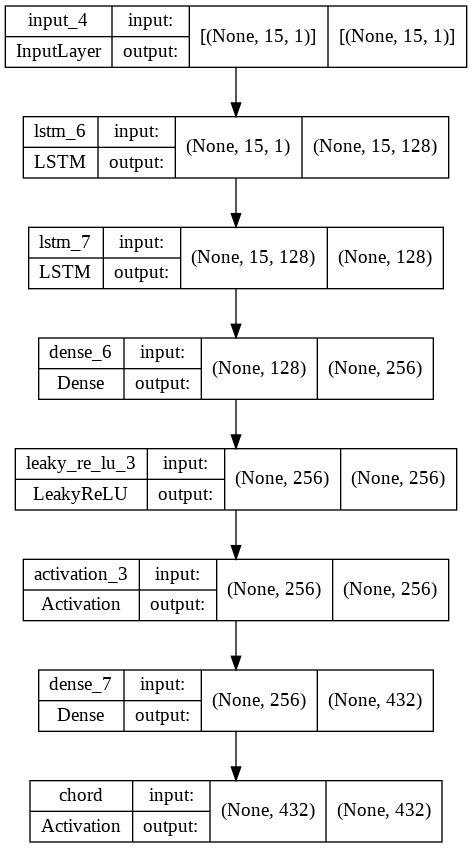

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# type(output1[0][0])
# type(y[0][0])

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(0.001),
                         
              loss={
                  'chord': 'categorical_crossentropy', 
              }
              ,metrics={
                  'chord': 'accuracy', 
              #     'octave': 'accuracy',
              #     'position': 'accuracy',
                  }
              )

In [ ]:

# history = model.fit(X_scaled[0:10000],[output1[0:10000],output2[0:10000],output3[0:10000]],
#                     epochs=50,
#                     validation_split=0.33,
#                      batch_size = 64,
#                     shuffle=True,
#                     verbose=0,
#                     ) 

history = model.fit(X,output1,
                    epochs=100,
                    validation_split=0.2,
                     batch_size = 256,
                    shuffle=True,
                    ) 

Epoch 1/100
98/98 [==============================] - 5s 18ms/step - loss: 5.9109 - accuracy: 0.0046 - val_loss: 5.8626 - val_accuracy: 0.0048
Epoch 2/100
98/98 [==============================] - 1s 9ms/step - loss: 5.8111 - accuracy: 0.0073 - val_loss: 5.7821 - val_accuracy: 0.0067
Epoch 3/100
98/98 [==============================] - 1s 9ms/step - loss: 5.7594 - accuracy: 0.0078 - val_loss: 5.7655 - val_accuracy: 0.0093
Epoch 4/100
98/98 [==============================] - 1s 9ms/step - loss: 5.7271 - accuracy: 0.0094 - val_loss: 5.7447 - val_accuracy: 0.0094
Epoch 5/100
98/98 [==============================] - 1s 9ms/step - loss: 5.6842 - accuracy: 0.0093 - val_loss: 5.7323 - val_accuracy: 0.0099
Epoch 6/100
98/98 [==============================] - 1s 9ms/step - loss: 5.6399 - accuracy: 0.0119 - val_loss: 5.7129 - val_accuracy: 0.0105
Epoch 7/100
98/98 [==============================] - 1s 10ms/step - loss: 5.5909 - accuracy: 0.0135 - val_loss: 5.7035 - val_accuracy: 0.0115
Epoch 8/100

In [ ]:
# _, accuracy = model.evaluate(X[0:100],[output1[0:100],output2[0:100],output3[0:100]])
# print('Accuracy of train set: %.2f' % (accuracy*100))


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#results=model.predict(X[:200])

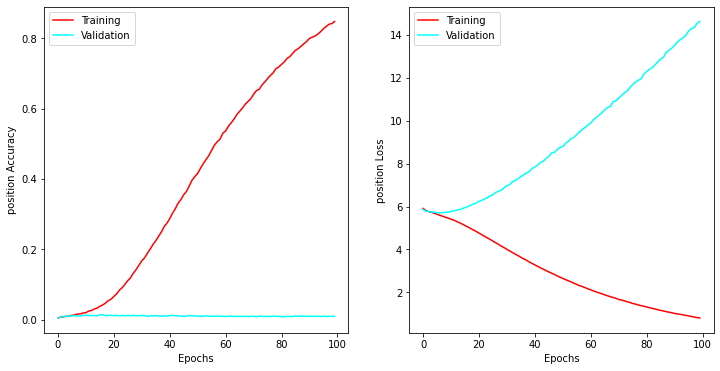

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.plot(train_acc, label='Training', color = 'red')
plt.plot(val_acc, label='Validation', color = 'aqua')
plt.xlabel('Epochs')
plt.ylabel('position Accuracy')
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(train_loss, label='Training', color = 'red')
plt.plot(val_loss, label='Validation', color = 'aqua')
plt.xlabel('Epochs')
plt.ylabel('position Loss')
plt.legend()

In [ ]:
# import matplotlib.pyplot as plt
# #==============Chord================
# train_acc = history.history['chord_accuracy']
# train_loss = history.history['chord_loss']
# val_acc = history.history['val_chord_accuracy']
# val_loss = history.history['val_chord_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) 
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('chord Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) 
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('chord Loss')
# plt.legend()

# #==============octave================
# train_acc = history.history['octave_accuracy']
# train_loss = history.history['octave_loss']
# val_acc = history.history['val_octave_accuracy']
# val_loss = history.history['val_octave_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) 
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('octave Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) 
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('octave Loss')
# plt.legend()
# #==============position================
# train_acc = history.history['position_accuracy']
# train_loss = history.history['position_loss']
# val_acc = history.history['val_position_accuracy']
# val_loss = history.history['val_position_loss']

# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1) 
# plt.plot(train_acc, label='Training', color = 'red')
# plt.plot(val_acc, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('position Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2) 
# plt.plot(train_loss, label='Training', color = 'red')
# plt.plot(val_loss, label='Validation', color = 'aqua')
# plt.xlabel('Epochs')
# plt.ylabel('position Loss')
# plt.legend()

In [ ]:
model.save('notePrediction.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "notePrediction.h5" "/content/drive/MyDrive/notePrediction.h5"